# **- Histórico de Crédito**

Na EDA de histórico de crédito, foram exploradas variáveis relacionadas ao comportamento passado do cliente, como atrasos, inadimplências e relacionamento com instituições financeiras. Essa análise ajudou a identificar padrões de risco recorrentes e a reforçar o poder preditivo do modelo na identificação de maus pagadores.

**- Bureau de crédito**

Avaliar a exposição do cliente a outros créditos fora da operação atual

In [ ]:
import pandas as pd

df = pd.read_csv("/content/df_final_selected_features.csv")
df.head(10)

,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,AMT_ANNUITY,AMT_CREDIT,INST_AMT_PAYMENT_MEAN,BUREAU_DAYS_CREDIT_MAX,DAYS_EMPLOYED,...,PREV_AMT_APPLICATION_MEAN,BUREAU_DAYS_CREDIT_ENDDATE_MIN,PREV_DAYS_DECISION_MIN,POS_CNT_INSTALMENT_MEAN,POS_MONTHS_BALANCE_MIN,PREV_AMT_GOODS_PRICE_MEAN,POS_SK_DPD_MEAN,PREV_STATUS_APPROVED,BUREAU_DAYS_ENDDATE_FACT_MIN,TARGET
0,Business Entity Type 3,0.083037,0.262949,0.139376,-9461.0,24700.5,406597.5,11559.247105,-103.0,-637.0,...,179055.000000,-1072.0,-606.0,24.000000,-19.0,179055.000000,0.000000,1.0,-1185.0,1.0
1,School,0.311267,0.622246,0.535276,-16765.0,35698.5,1293502.5,64754.586000,-606.0,-1188.0,...,435436.500000,-2434.0,-2341.0,10.107143,-77.0,435436.500000,0.000000,3.0,-2131.0,0.0
2,Government,0.505998,0.555912,0.729567,-19046.0,6750.0,135000.0,7096.155000,-408.0,-225.0,...,24282.000000,-595.0,-815.0,3.750000,-27.0,24282.000000,0.000000,1.0,-683.0,0.0
3,Business Entity Type 3,0.505998,0.650442,0.535276,-19005.0,29686.5,312682.5,62947.088438,-300.0,-3039.0,...,272203.260000,-1253.0,-617.0,11.428571,-20.0,408304.890000,0.000000,5.0,-1241.0,0.0
4,Religion,0.505998,0.322738,0.535276,-19932.0,21865.5,513000.0,12214.060227,-1149.0,-3038.0,...,150530.250000,-783.0,-2357.0,15.333333,-77.0,150530.250000,0.000000,6.0,-783.0,0.0
5,Other,0.505998,0.354225,0.621226,-16941.0,27517.5,490495.5,27360.502714,-78.0,-1588.0,...,155701.800000,-853.0,-2536.0,11.518072,-84.0,194627.250000,339.060241,4.0,-1028.0,0.0
6,Business Entity Type 3,0.774761,0.724000,0.492060,-13778.0,41301.0,1560726.0,9568.531765,-239.0,-3130.0,...,76741.714286,-2152.0,-1562.0,7.875000,-96.0,76741.714286,0.000000,7.0,-2152.0,0.0
7,Other,0.505998,0.714279,0.540654,-18850.0,42075.0,1530000.0,27449.208000,-1138.0,-449.0,...,247212.000000,-928.0,-1070.0,10.000000,-35.0,247212.000000,0.000000,1.0,-1138.0,0.0
8,XNA,0.587334,0.205747,0.751724,-20099.0,33826.5,1019610.0,11328.893654,-1309.0,365243.0,...,202732.875000,-2173.0,-2508.0,19.186667,-83.0,270310.500000,205.666667,3.0,-2197.0,0.0
9,Electricity,0.505998,0.746644,0.535276,-14469.0,20250.0,405000.0,10451.285625,-300.0,-2019.0,...,60930.000000,-1253.0,-1673.0,19.021739,-55.0,81240.000000,0.000000,3.0,-1241.0,0.0


 **- Exposição ao crédito (Bureau) × Inadimplência**

 Entender se clientes com maior histórico de crédito no bureau apresentam diferença na taxa de inadimplência

/tmp/ipython-input-1829406576.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('CREDIT_EXPOSURE_BIN')['TARGET'].mean().mul(100).round(2))


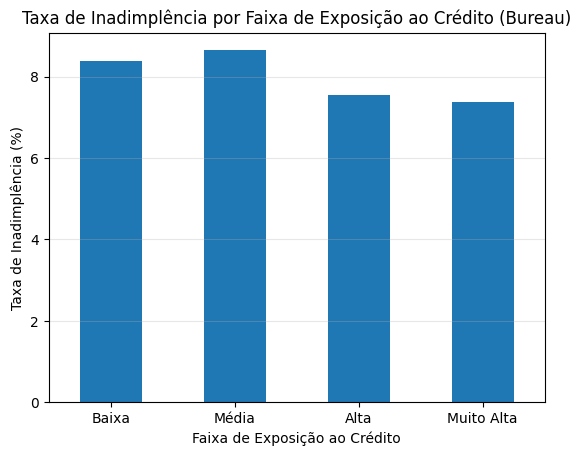

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Criar faixas de exposição ao crédito (quartis)
df['CREDIT_EXPOSURE_BIN'] = pd.qcut(
    df['BUREAU_AMT_CREDIT_SUM_SUM'],
    q=4,
    labels=['Baixa', 'Média', 'Alta', 'Muito Alta']
)

# Calcular taxa de inadimplência por faixa
default_rate_exposure = (
    df.groupby('CREDIT_EXPOSURE_BIN')['TARGET'].mean().mul(100).round(2))

# Plotar gráfico de barras simples
default_rate_exposure.plot(kind='bar')

# Ajustes visuais básicos
plt.title('Taxa de Inadimplência por Faixa de Exposição ao Crédito (Bureau)')
plt.xlabel('Faixa de Exposição ao Crédito')
plt.ylabel('Taxa de Inadimplência (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

plt.show()


A exposição histórica ao crédito no bureau apresenta relação não linear com inadimplência, com maior risco concentrado em níveis intermediários. Isso indica que a variável deve ser tratada de forma categórica ou combinada com dívida ativa, evitando suposições lineares no modelo.

/tmp/ipython-input-106369532.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('DEBT_BIN')['TARGET'].mean().mul(100)


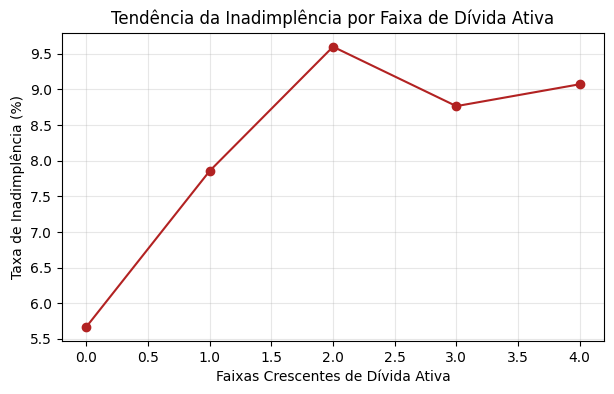

In [ ]:
# Criar faixas de dívida ativa
df['DEBT_BIN'] = pd.qcut(
    df['BUREAU_AMT_CREDIT_SUM_DEBT_SUM'],
    q=5,
    duplicates='drop'
)

# Calcular taxa de inadimplência
debt_default_rate = (
    df.groupby('DEBT_BIN')['TARGET'].mean().mul(100)
)

# Plotar gráfico de linha
plt.figure(figsize=(7,4))
plt.plot(
    debt_default_rate.values,
    marker='o',
    color ='firebrick'
)

# Ajustes visuais
plt.title('Tendência da Inadimplência por Faixa de Dívida Ativa')
plt.xlabel('Faixas Crescentes de Dívida Ativa')
plt.ylabel('Taxa de Inadimplência (%)')
plt.grid(alpha=0.3)

plt.show()


Observa-se uma relação positiva entre o nível de dívida ativa no bureau e a taxa de inadimplência, com aumento expressivo do risco até faixas intermediárias e posterior estabilização. Esse comportamento indica efeito de saturação do risco e reforça o poder preditivo da dívida acumulada. O insight fundamenta a criação de features binadas e razões de endividamento para modelos de crédito.

**- Recência de Crédito**

Recência mede há quanto tempo ocorreu o último evento relevante de crédito

In [ ]:
# Converter para valor positivo
df['RECENCY_CREDIT_DAYS'] = df['BUREAU_DAYS_CREDIT_MIN'].abs()

In [ ]:
# Criar faixas de recência (binning)
df['RECENCY_BIN'] = pd.qcut(
    df['RECENCY_CREDIT_DAYS'],
    q=5,
    labels=['Muito Recente', 'Recente', 'Intermediário', 'Antigo', 'Muito Antigo']
)

In [ ]:
# Calcula a taxa de inadimplência (%) por faixa de recência de crédito
recency_default_rate = (
    df.groupby('RECENCY_BIN')['TARGET'].mean().mul(100).round(2))


/tmp/ipython-input-2781517282.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('RECENCY_BIN')['TARGET'].mean().mul(100).round(2))


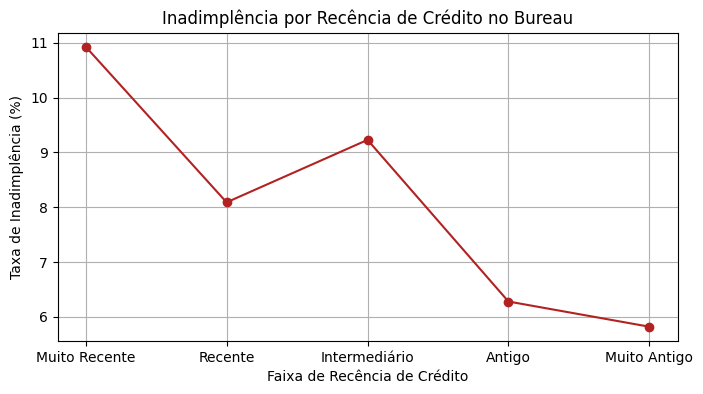

In [ ]:
# Cria o gráfico de linha da inadimplência por recência
plt.figure(figsize=(8,4))
plt.plot(
    recency_default_rate.index,
    recency_default_rate.values,
    marker='o',
    color='firebrick'
)
plt.title('Inadimplência por Recência de Crédito no Bureau')
plt.xlabel('Faixa de Recência de Crédito')
plt.ylabel('Taxa de Inadimplência (%)')
plt.grid(True)
plt.show()


A recência de crédito demonstra forte relação com inadimplência, indicando que operações mais recentes refletem maior estresse financeiro. O padrão observado reforça o uso de variáveis temporais como preditores centrais de risco. Esse insight fundamenta a criação de features de recência e interações com endividamento e histórico de crédito

**- Maturidade do Histórico de Crédito (Bureau)**

tempo médio de relacionamento do cliente com o sistema de crédito

In [ ]:
# Criar faixas manuais de maturidade do histórico
df['MATURITY_BIN'] = pd.cut(
    df['BUREAU_N_MONTHS_MEAN'],
    bins=[-1, 0, 12, 36, 60, df['BUREAU_N_MONTHS_MEAN'].max()],
    labels=[
        'Sem Histórico',
        'Curto (≤ 1 ano)',
        'Médio (1–3 anos)',
        'Longo (3–5 anos)',
        'Muito Longo (> 5 anos)'
    ]
)

/tmp/ipython-input-2254296373.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('MATURITY_BIN')['TARGET'].mean().mul(100).round(2)


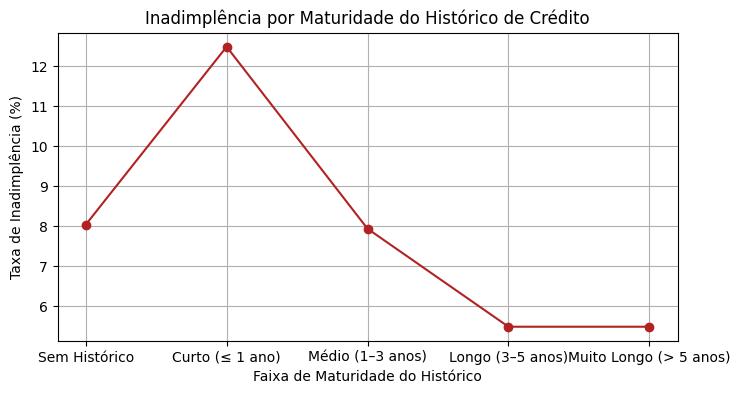

In [ ]:
# Calcular taxa de inadimplência por faixa de maturidade
maturity_default = (
    df.groupby('MATURITY_BIN')['TARGET'].mean().mul(100).round(2)
)

# Plotar tendência
plt.figure(figsize=(8, 4))
plt.plot(
    maturity_default.index,
    maturity_default.values,
    marker='o',
    color='firebrick'
)

plt.title('Inadimplência por Maturidade do Histórico de Crédito')
plt.xlabel('Faixa de Maturidade do Histórico')
plt.ylabel('Taxa de Inadimplência (%)')
plt.grid(True) # Exibe grade para facilitar leitura

plt.show()


A maturidade do histórico de crédito apresenta relação inversa com inadimplência, refletindo maior confiabilidade em clientes com histórico longo. Clientes com pouco tempo no bureau concentram maior incerteza e risco. Essa variável é essencial para capturar estabilidade financeira e potencializar interações com recência e endividamento.

**- Maturidade x Endividamento**

A maturidade do histórico reduz risco igualmente para todos os níveis de endividamento?

In [ ]:
# Criar faixas de endividamento
df['DEBT_BIN'] = pd.qcut(
    df['BUREAU_AMT_CREDIT_SUM_DEBT_SUM'],
    q=4,
    labels=['Baixo', 'Médio', 'Alto', 'Muito Alto'],
    duplicates='drop'
)

In [ ]:
# Taxa de inadimplência por maturidade e endividamento
interaction_rate = (
    df.groupby(['MATURITY_BIN', 'DEBT_BIN'])['TARGET'].mean().reset_index()
)

/tmp/ipython-input-146951669.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['MATURITY_BIN', 'DEBT_BIN'])['TARGET'].mean().reset_index()


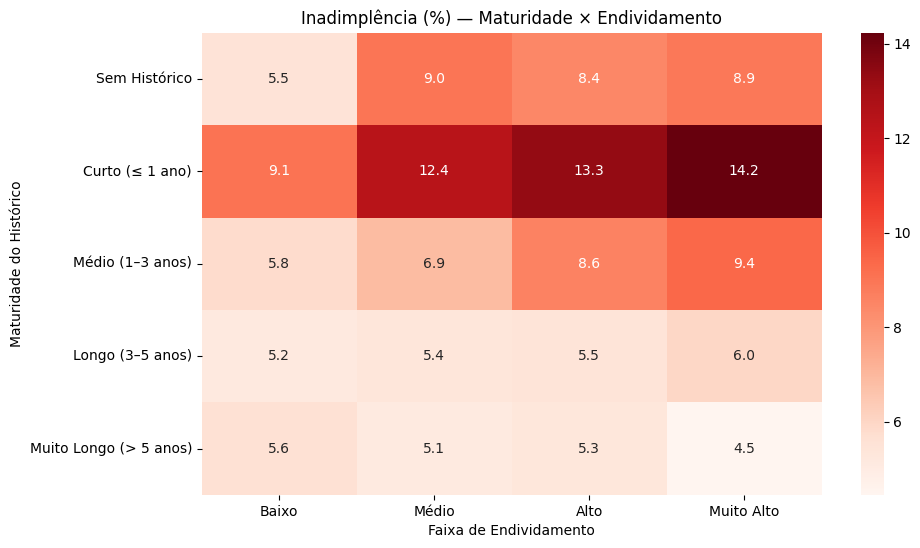

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar tabela pivot
pivot = interaction_rate.pivot(
    index='MATURITY_BIN',
    columns='DEBT_BIN',
    values='TARGET'
)

# Plotar heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot * 100,
    annot=True,
    fmt=".1f",
    cmap="Reds"
)
plt.title('Inadimplência (%) — Maturidade × Endividamento')
plt.xlabel('Faixa de Endividamento')
plt.ylabel('Maturidade do Histórico')
plt.show()

O risco de inadimplência é fortemente determinado pela interação entre maturidade do histórico e endividamento: clientes com histórico curto e alta dívida concentram o maior risco, enquanto histórico longo mitiga o impacto do endividamento.
As variáveis isoladas perdem poder explicativo; é essencial criar features de interação para capturar esse efeito não linear.